In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

In [2]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


In [5]:
df.tail() #Display last 5 rows of the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
df.shape

(6362620, 11)

In [7]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


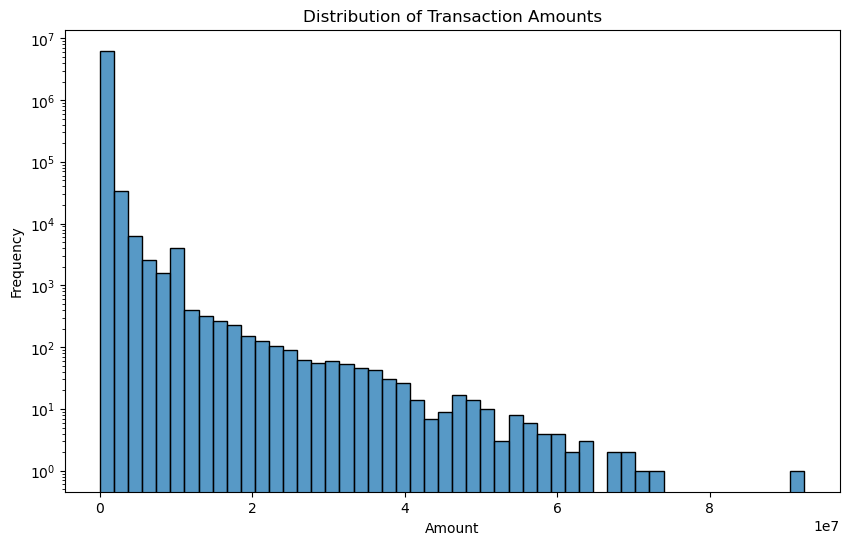

In [10]:
plt.figure(figsize=(10,6)) #total amount of transaction
sns.histplot(df['amount'],bins=50,kde=False)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

c:\Users\xiaoj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


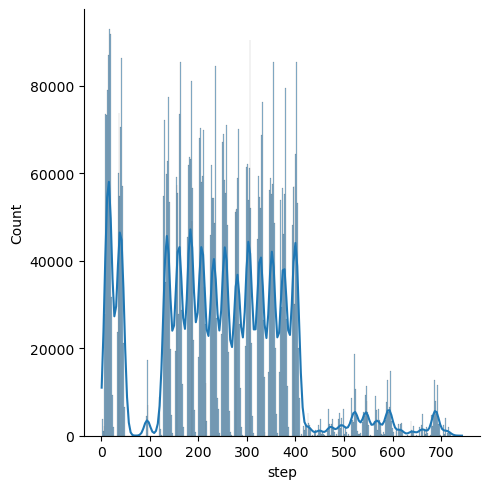

In [11]:
sns.displot(df['step'], kde=True)

In [12]:
df['step'].skew() #the skew is close to 0 which indicates that the distribution is symmetric. The number is also positive, which means the tail on the right side is longer than the left side. 

0.37517688846984765

c:\Users\xiaoj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


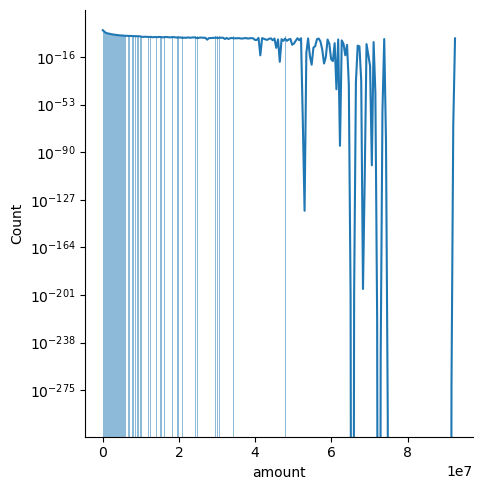

In [52]:
sns.displot(df['amount'], kde=True)
plt.yscale('log')
plt.show()

In [14]:
df['amount'].skew() #the number is very high, which indicates a strong asymmetry in the distribution. 

30.99394948249038

In [14]:
file_path='PS_20174392719_1491204439457_log.csv'

In [17]:
df_sample = df.sample(n=50000, random_state=42) #I want to randomze the dataset. 

In [18]:
df_sample['isFraud'].value_counts() #it shows there are 70 fraud cases.

isFraud
0    49930
1       70
Name: count, dtype: int64

In [19]:
df_sample['isFlaggedFraud'].value_counts() #it shows only 1 is flagged fraud. 

isFlaggedFraud
0    49999
1        1
Name: count, dtype: int64

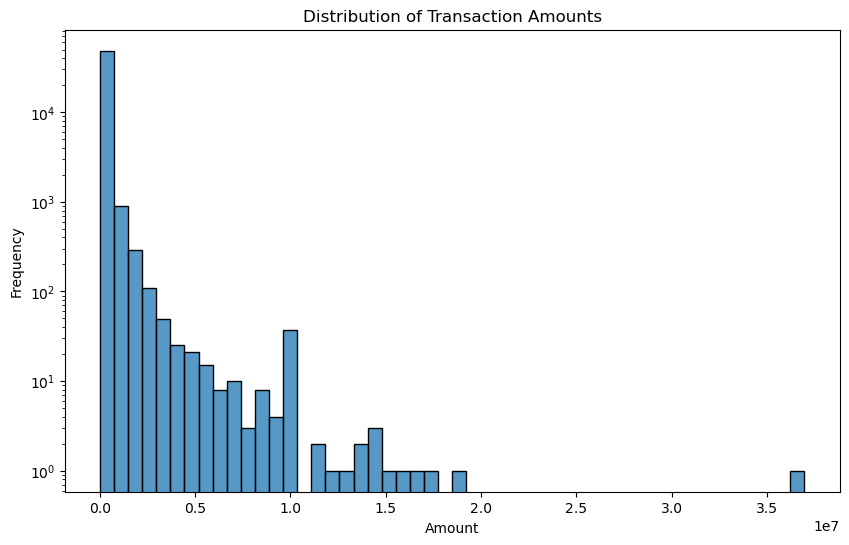

In [54]:
plt.figure(figsize=(10,6)) #sample transaction amounts
sns.histplot(df_sample['amount'],bins=50,kde=False)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

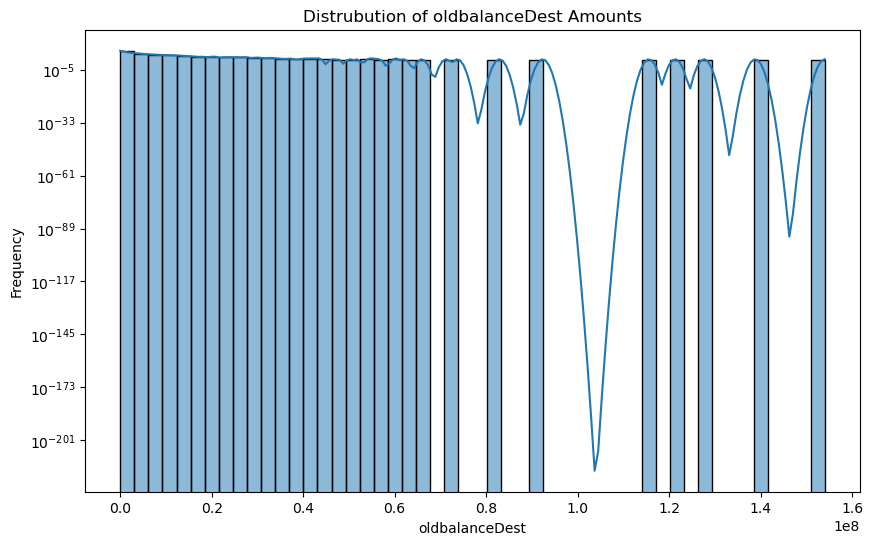

In [51]:
plt.figure(figsize=(10,6))  
sns.histplot(df_sample['oldbalanceDest'],bins=50,kde=True)
plt.title('Distrubution of oldbalanceDest Amounts')
plt.xlabel('oldbalanceDest')
plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

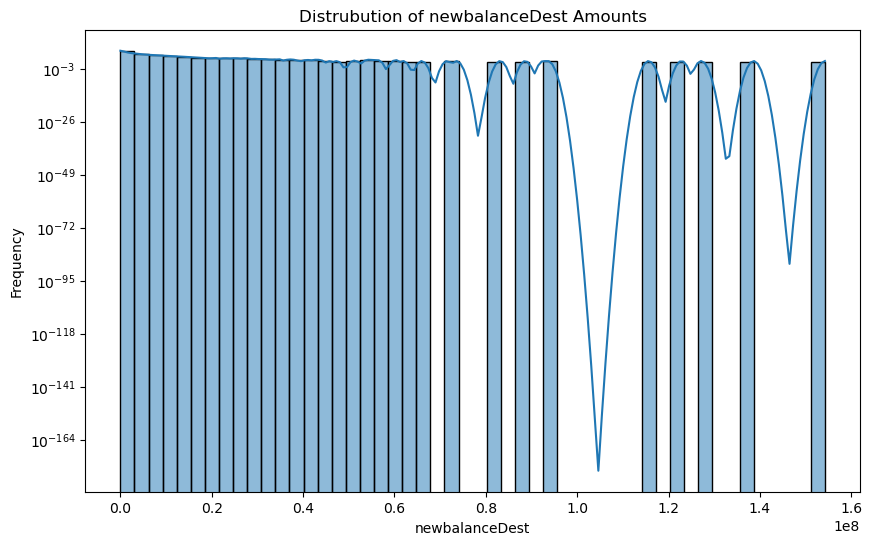

In [47]:
plt.figure(figsize=(10,6))
sns.histplot(df_sample['newbalanceDest'],bins=50,kde=True)
plt.title('Distrubution of newbalanceDest Amounts')
plt.xlabel('newbalanceDest')
plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

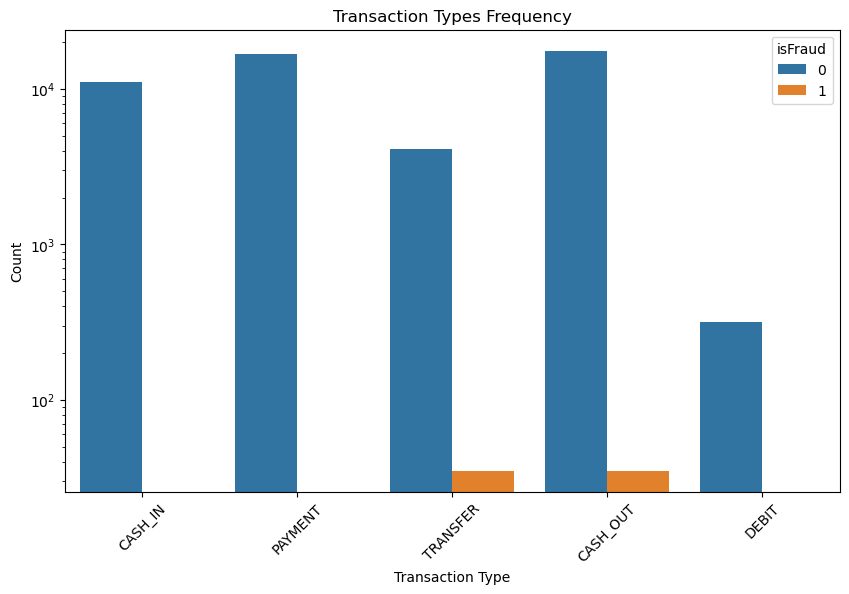

In [46]:
plt.figure(figsize=(10,6)) 
sns.countplot(x='type',data=df_sample,hue='isFraud')
plt.title('Transaction Types Frequency')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

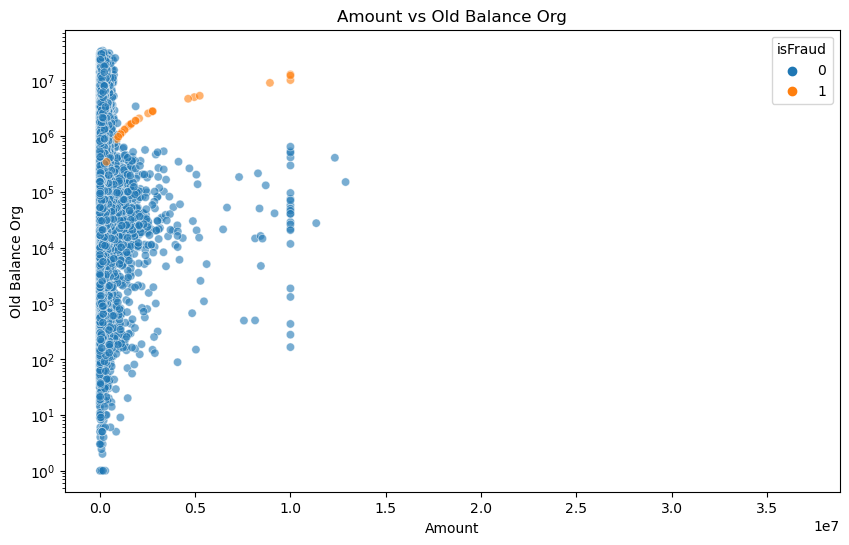

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='amount',y='oldbalanceOrg',hue='isFraud',data=df_sample,alpha=0.6)
plt.title('Amount vs Old Balance Org')
plt.xlabel('Amount')
plt.yscale('log')
plt.ylabel('Old Balance Org')
plt.show()

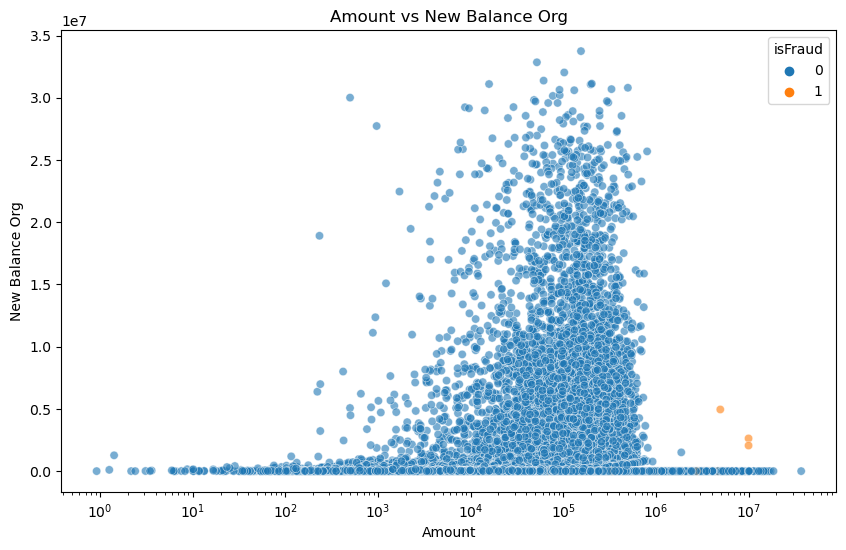

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='amount',y='newbalanceOrig', hue='isFraud', data=df_sample, alpha=0.6)
plt.title('Amount vs New Balance Org')
plt.xlabel('Amount')
plt.xscale('log')
plt.ylabel('New Balance Org')
plt.show()


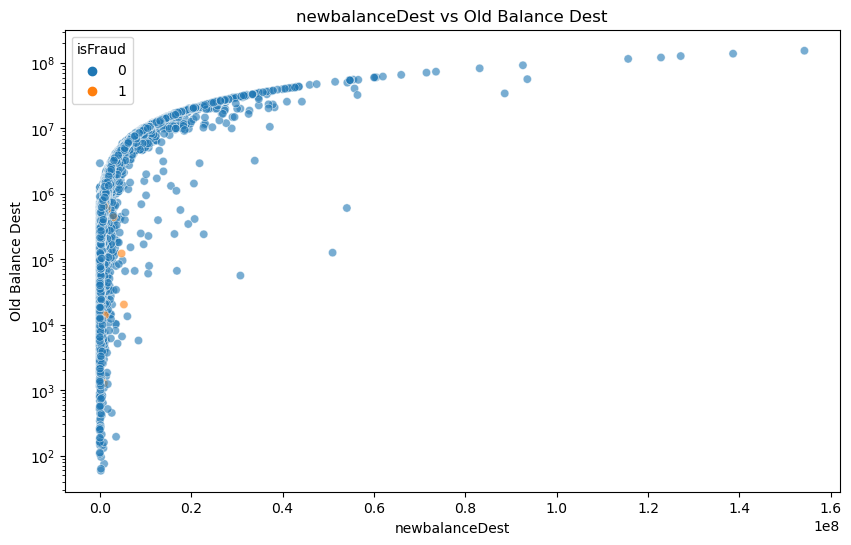

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='newbalanceDest',y='oldbalanceDest',hue='isFraud',data=df_sample,alpha=0.6)
plt.title('newbalanceDest vs Old Balance Dest')
plt.xlabel('newbalanceDest')
plt.ylabel('Old Balance Dest')
plt.yscale('log')
plt.show()

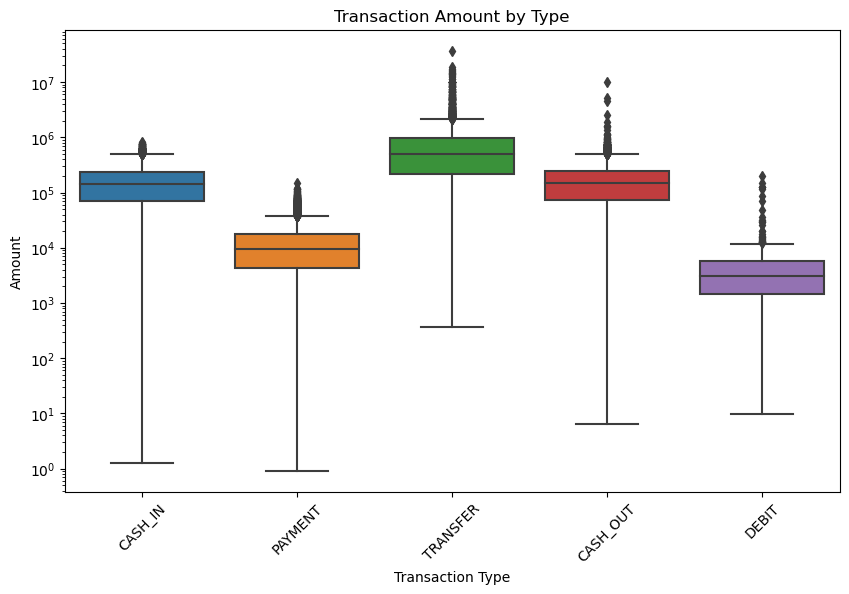

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='type',y='amount',data=df_sample)
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

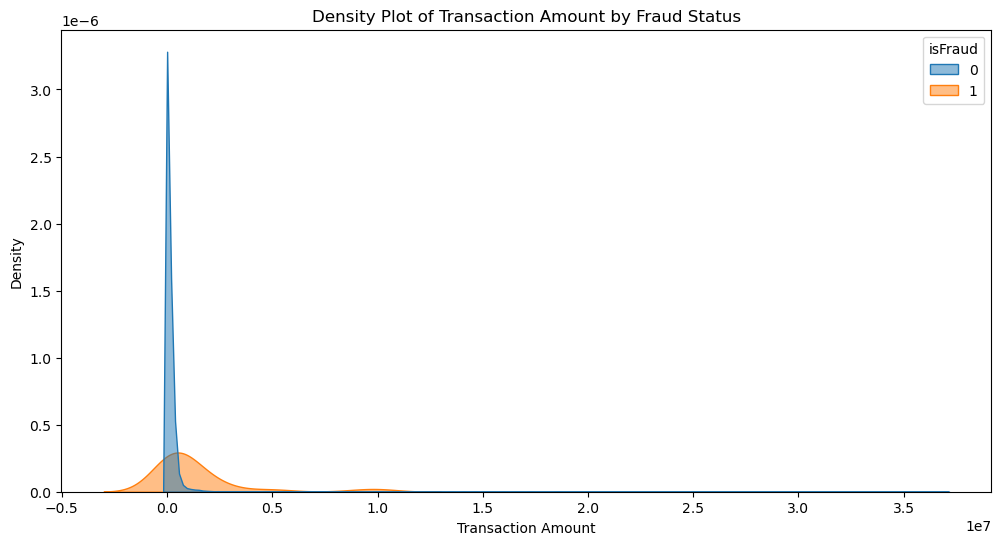

In [40]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df_sample,x='amount', hue='isFraud', fill=True,common_norm=False,alpha=0.5)
plt.title('Density Plot of Transaction Amount by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

c:\Users\xiaoj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


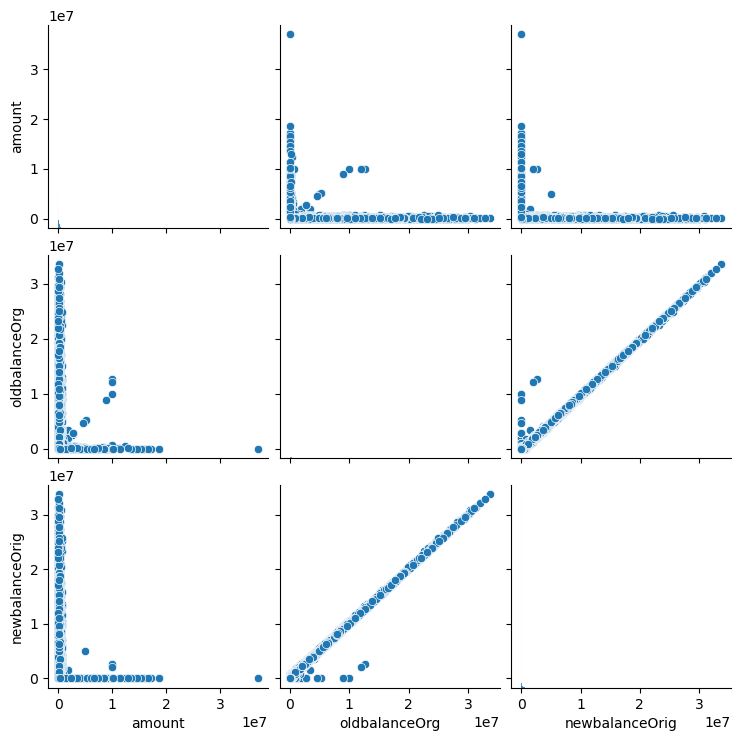

In [47]:
selected_features=['amount','oldbalanceOrg','newbalanceOrig']
sns.pairplot(df_sample[selected_features])
plt.show()

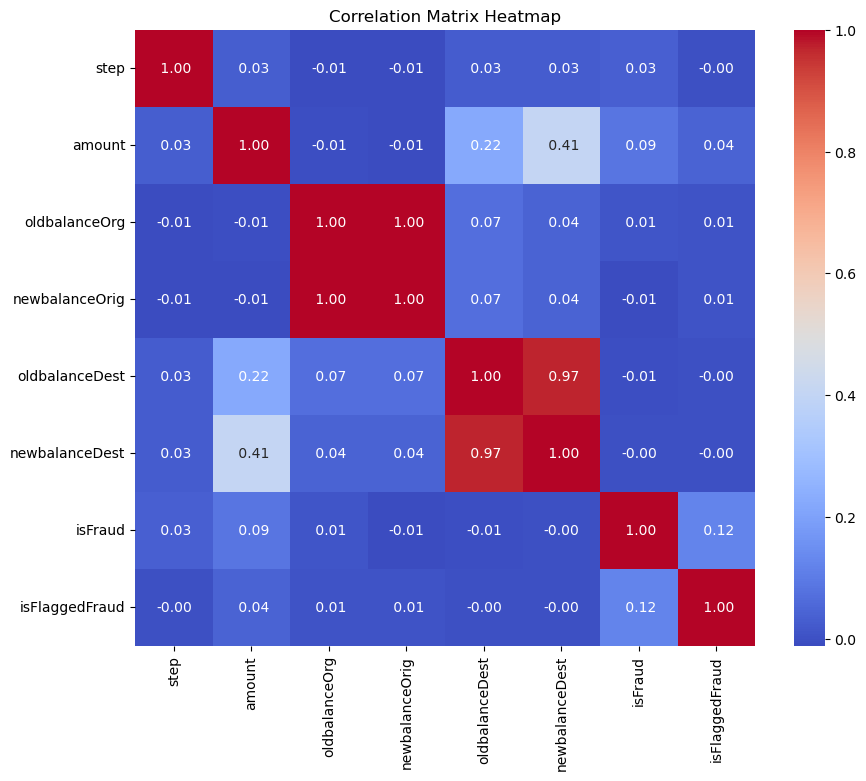

In [48]:
corr_matrix=df_sample.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True, fmt=" .2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

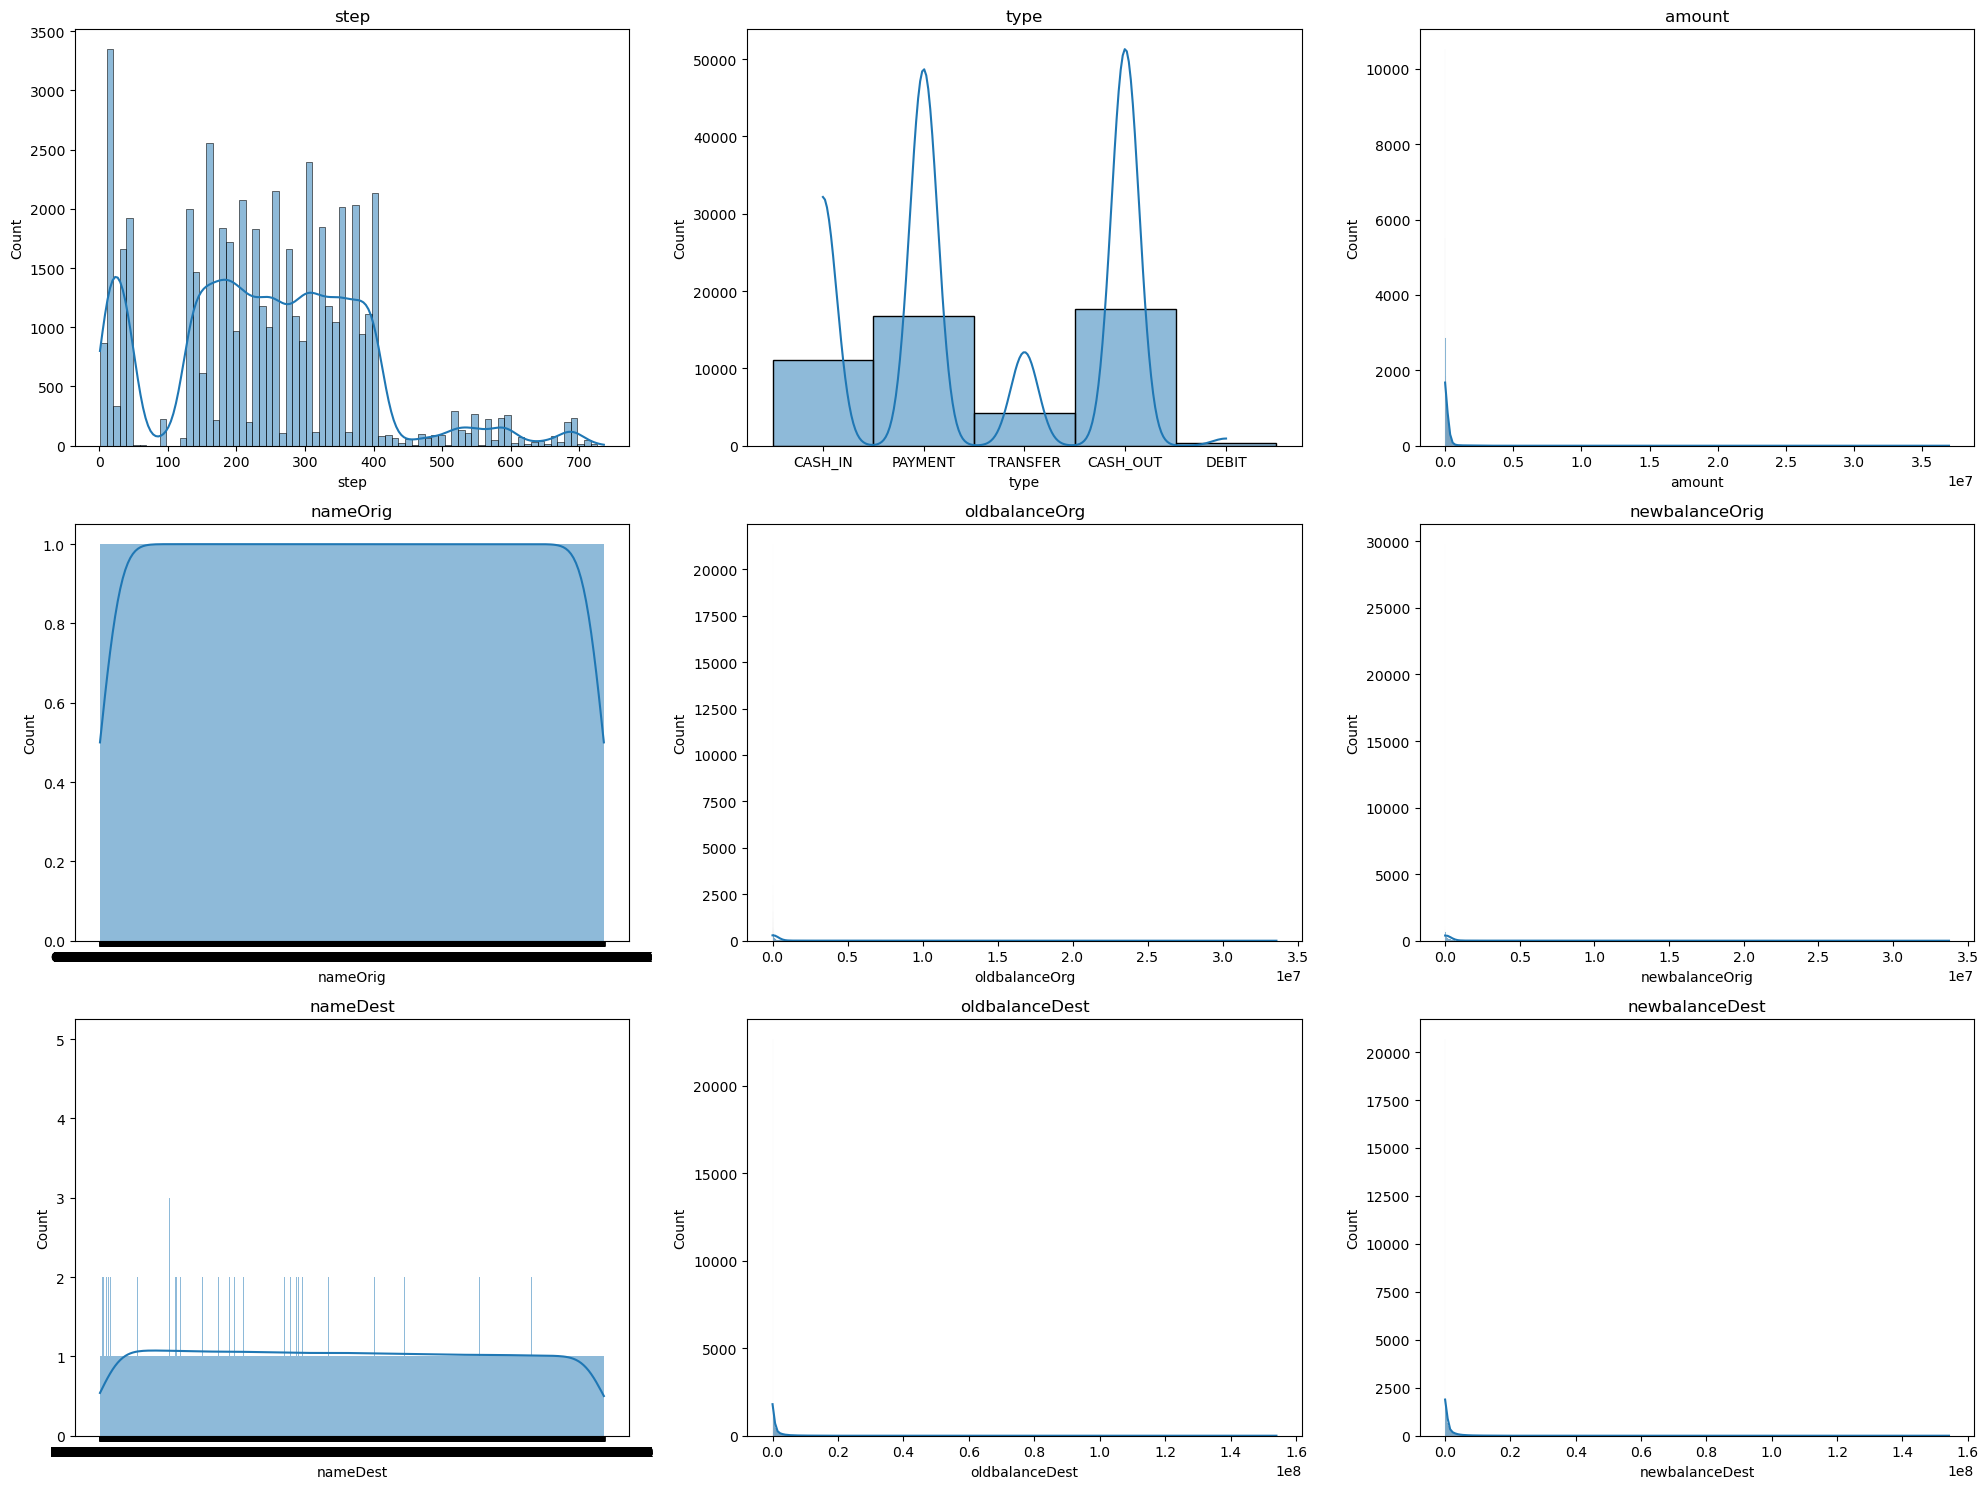

In [49]:
import math

num_columns = df_sample.shape[1]  # Get the number of columns in df_sample
grid_size = min(9, num_columns)  # Ensure the grid size does not exceed 9 subplots

# Calculate the number of rows and columns for the subplot grid
num_rows = math.ceil(grid_size / 3)
num_cols = min(3, grid_size)

plt.figure(figsize=(20, 15))
for i, column in enumerate(df_sample.columns[:grid_size]):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df_sample[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()